# Pymaceuticals Inc.
---

### Analysis

- This is a results analysis of a 45-day study which tested the performance of ten (10) drug treatment regimens for a type of skin cancer on a group of 249 mice, with a focus on the drug Capomulin. This analysis reviews data from the study results as compared to the biometric data of the mice. It should be noted that this analysis includes 248 mice, as the results from one mouse were corrupted by a duplication in the mouse ID; consequently, that data was removed from this analysis.

-- Conclusions/Comparisons: Overall, the top performers were Capomulin, Ramicane, Infubinol, and Ceftamin; however, despite Capomulin and Ramicane being administered roughly 25% more, it would seem that Infubinol and Ceftamin had more significant effects on final tumor size. Observations also include a potential outlier in the Infubinol data, but no others on the drug leaderboard. In regard specifically to the drug of interest, Capomulin, the data tells us that the drug is most effective after the 20-day mark.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# check out mouse metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# check out study result data
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of individual mice.
mice_count = df["Mouse ID"].unique().size
mice_count

249

In [8]:
# mice with duplicated IDs
mask1 = df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_id = df[mask1]
duplicate_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(20)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_backup = df.copy()

df = df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [12]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

In [13]:
# list of drugs
drugs = df["Drug Regimen"].unique()
drugs
df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 3)
med = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 3)
var = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 3)
stdev = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 3)
sems = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 3)

stat_summary = pd.DataFrame()
stat_summary["Mean"] = means
stat_summary["Median"] = med
stat_summary["Variance"] = var
stat_summary["Standard Deviation"] = stdev
stat_summary["SEM"] = sems

stat_summary = stat_summary.reset_index()
stat_summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
round(df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}), 3)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

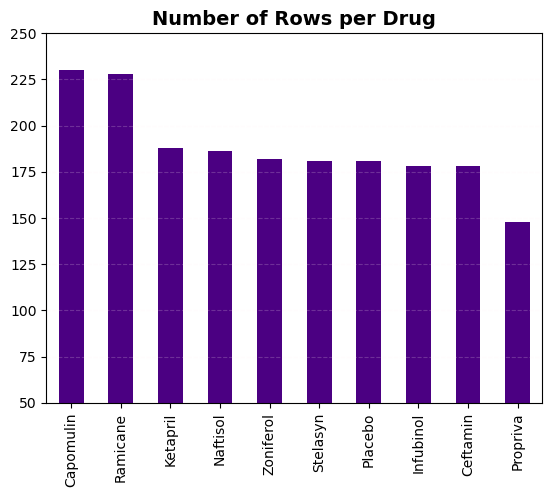

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = df["Drug Regimen"].value_counts()

data.plot(kind="bar", color="indigo")
plt.title("Number of Rows per Drug", fontsize=14, fontweight="bold")
plt.grid(axis="y", c="lavenderblush", linestyle="dashed", alpha=0.2)
plt.ylim(50, 250)
plt.show()

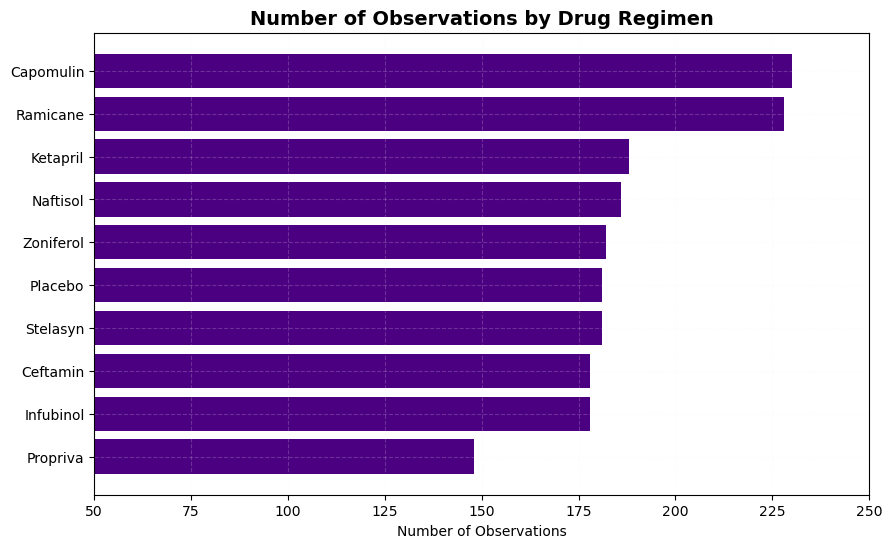

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = data.sort_values().reset_index()
data.columns = ["Drug Regimen", "Number of Rows"]


plt.figure(figsize=(10,6))
plt.barh(data["Drug Regimen"], data["Number of Rows"], color="indigo")
plt.xlabel("Number of Observations")
plt.title("Number of Observations by Drug Regimen", fontsize=14, fontweight="bold")

plt.grid(axis="both", color="lavenderblush", alpha=0.2, linestyle="--")
plt.xlim(50, 250)
plt.show()

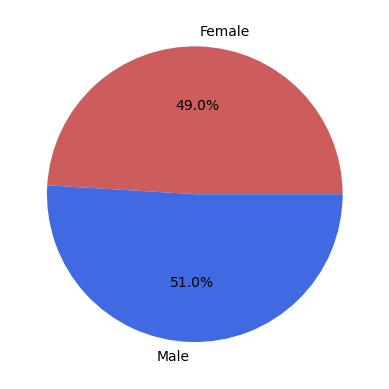

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df.groupby("Sex").size().plot(kind="pie", colors=["indianred", "royalblue"], autopct="%1.1f%%")
plt.show()

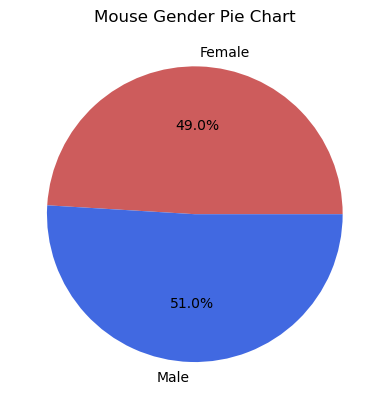

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = df.groupby("Sex").size().values
labels = ["Female", "Male"]
colors = ["indianred", "royalblue"]
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Mouse Gender Pie Chart")
plt.show()

In [20]:
df.groupby("Sex").size()

Sex
Female    922
Male      958
dtype: int64

## Quartiles, Outliers and Boxplots

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(max_time, df, on=["Mouse ID", "Timepoint"], how="inner")
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df2 = last_df.loc[last_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index(drop=True)
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [23]:
# list the names of the columns, for reference
df2.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

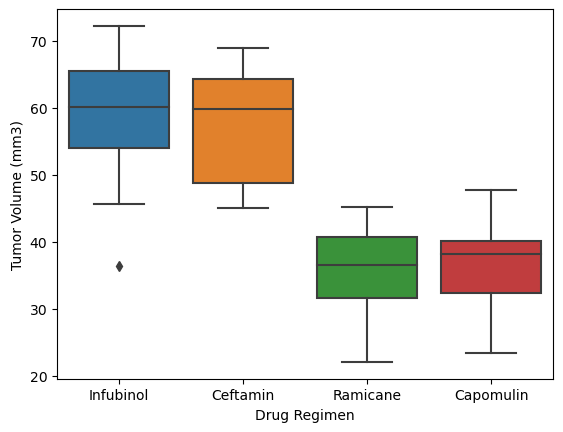

In [24]:
# drug effect on tumor (via seaborn)
sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

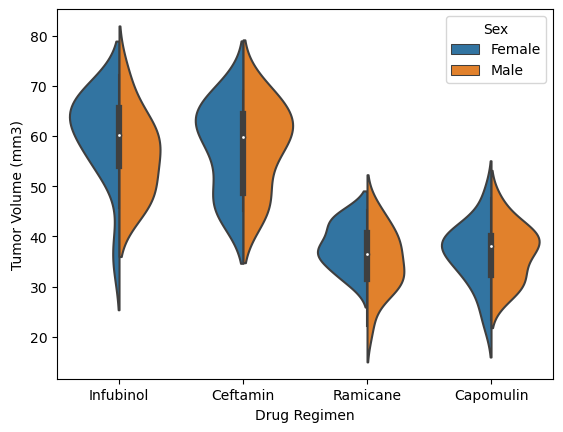

In [25]:
# drug effect on tumor, by mouse sex (violin plot)
sns.violinplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex", split=True)
plt.show()

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


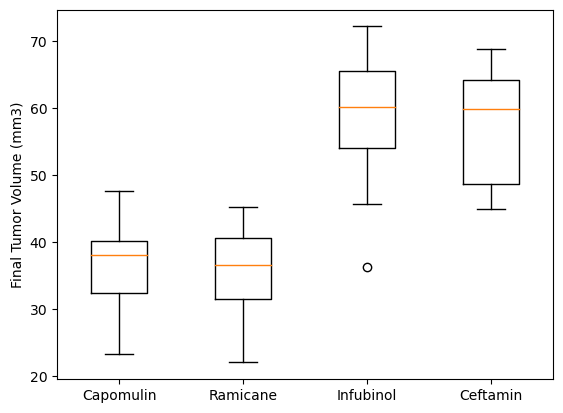

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group (via matplotlib).
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

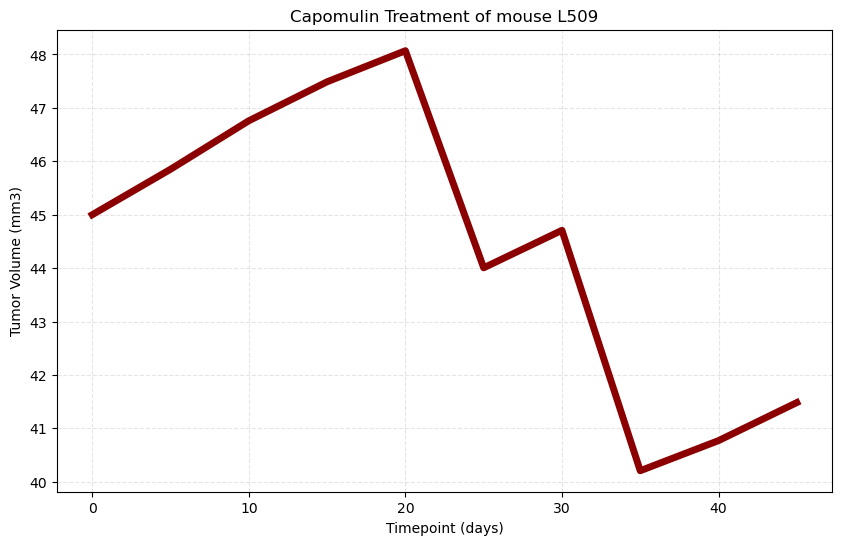

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_sub = df.loc[df["Mouse ID"] == "l509"] 

plt.figure(figsize=(10,6))
plt.plot(df_sub.Timepoint, df_sub["Tumor Volume (mm3)"], color="darkred", linewidth=5)
plt.grid(axis="both", c="gray", linestyle="dashed", alpha=0.2)
plt.title("Capomulin Treatment of mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

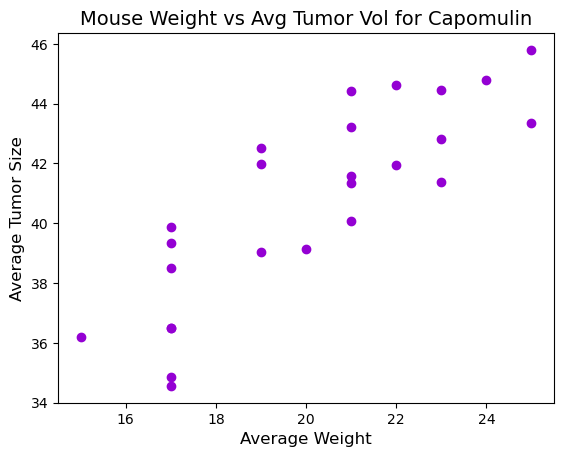

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

plt.scatter(data["Average Weight"], data["Average Tumor Size"], color="darkviolet")
plt.title("Mouse Weight vs Avg Tumor Vol for Capomulin", fontsize=14)
plt.xlabel("Average Weight", fontsize=12)
plt.ylabel("Average Tumor Size", fontsize=12)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


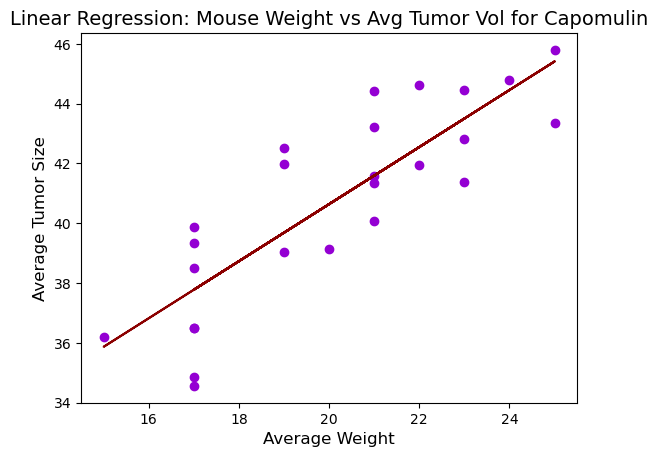

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

# the linear regression line (via AskBCS)
slope, intercept = np.polyfit(data["Average Weight"], data["Average Tumor Size"], 1)
line = slope * data["Average Weight"] + intercept

plt.scatter(data["Average Weight"], data["Average Tumor Size"], color="darkviolet")
plt.plot(data["Average Weight"], line, color = "darkred")
plt.title("Linear Regression: Mouse Weight vs Avg Tumor Vol for Capomulin", fontsize=14)
plt.xlabel("Average Weight", fontsize=12)
plt.ylabel("Average Tumor Size", fontsize=12)

print(f"The correlation between mouse weight and the average tumor volume is {round(data.corr(numeric_only = True).iloc[0,1], 2)}")

plt.show()